# Project NLP Customer reviews

In [1]:
%pip install kagglehub

import kagglehub
import os
os.environ["WANDB_DISABLED"] = "true" #disabling so it wont block training. possible to enable later with wandb API
os.environ["WANDB_MODE"] = "disabled"
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("datafiniti/consumer-reviews-of-amazon-products")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/consumer-reviews-of-amazon-products


In [2]:
# Find the first CSV file in the dataset directory
files = [f for f in os.listdir(path) if f.endswith('.csv')]
csv_file = os.path.join(path, files[0])

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)
df.head()

id             dateAdded           dateUpdated  \
0  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   
3  Computers,Electronics Features,Tablets,Electro...       Electronics   
4  Computers,Electronics Features,Tablets,Electro...       Electronics   

                                           imageURLs  \
0  https://pisces.bbystatic.com/image2/BestBuy_US...   
1  https://pisces.bbystatic.com/image2/BestBuy_US...   
2  https://pisces.bbystatic.com/image2/BestBuy_US...   
3  https://pisces.bbystatic.com/image2/BestBuy_US...   
4  https://pisces.bbystatic.com/image2/BestBuy_US...   

                                                keys  ...  \
0  allnewkindleereaderblack6glarefreetouchscreend...  ...   
1  allnewkindleereaderblack6glarefreetouchscreend...  ...   
2  allnewkindleereaderblack6glarefreetouchscreend...  ...   
3  allnewkindleereaderblack6glarefreetouchscreend...  ...   
4  allnewkindleereaderblack6glarefreetouchscreend...  ...   

                                    reviews.dateSeen reviews.doRecommend  \
0  2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...               False   
1  2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...                True   
2                               2018-05-27T00:00:00Z                True   
3                               2018-10-09T00:00:00Z                True   
4                               2018-05-27T00:00:00Z                True   

    reviews.id reviews.numHelpful reviews.rating  \
0          NaN                  0              3   
1          NaN                  0              5   
2          NaN                  0              4   
3  177283626.0                  3              5   
4          NaN                  0              5   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5442403/review...   
1  http://reviews.bestbuy.com/3545/5442403/review...   
2  https://reviews.bestbuy.com/3545/5442403/revie...   
3  https://redsky.target.com/groot-domain-api/v1/...   
4  https://reviews.bestbuy.com/3545/5442403/revie...   

                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   
3  I am 100 happy with my purchase. I caught it o...   
4  Solid entry level Kindle. Great for kids. Gift...   

                                  reviews.title  reviews.username  \
0                                     Too small            llyyue   
1  Great light reader. Easy to use at the beach            Charmi   
2                           Great for the price      johnnyjojojo   
3                                   A Great Buy           Kdperry   
4      Solid entry-level Kindle. Great for kids       Johnnyblack   

                                          sourceURLs  
0  https://www.newegg.com/Product/Product.aspx%25...  
1  https://www.newe

In [3]:
%pip install transformers torch



from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

# Load tokenizer and model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Set model to evaluation mode
model.eval()


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [5]:
#Define sentiment labels
labels = ['Negative', 'Neutral', 'Positive']

#Function to predict sentiment
def classify_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=1)
        predicted_class = torch.argmax(probs).item()
    return labels[predicted_class]


In [6]:
# Drop missing values first
df = df.dropna(subset=['reviews.text'])

# Take a sample (optional, for speed)
sample_df = df.sample(10)  # or more later
sample_df.to_csv('sample_reviews.csv', index=False)

# Apply sentiment classification
sample_df['predicted_sentiment'] = sample_df['reviews.text'].apply(classify_sentiment)

sample_df[['reviews.text', 'predicted_sentiment']]

reviews.text predicted_sentiment
1200  Asking trivia questions of Alexa is a hoot but...            Positive
632   Very similar to FaceTime on an Apple product.Y...            Positive
1208  We like using the Echo. Probably didn't need t...            Positive
1174  This Amazon Echo is the COOLEST gadget you can...            Positive
2415  Easy to navigate. Daughter loves it. It's ligh...            Positive
4691  Pricey? Yes... For serious readers and users o...            Positive
1080  I enjoy Alexa, she reminds me of appointment a...            Positive
1255  Bought this for my parents to use with their A...            Positive
3057  I added this to my echo collection great for o...            Negative
3146  It's not bad for the novelty of Alexa. Might a...            Positive

In [7]:
#sample a subset
sample_texts = df['reviews.text'].sample(5, random_state=42).tolist()

In [8]:
# Add predicted_sentiment to df if not already present
if 'predicted_sentiment' not in df.columns:
    df['predicted_sentiment'] = df['reviews.text'].apply(classify_sentiment)

df['sentiment_label'] = df['predicted_sentiment']

#prepare dataset
df_labeled = df.dropna(subset=['sentiment_label'])  # manually added column
df_labeled['sentiment_label'].value_counts()

#convert columns
label2id = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df_labeled['label'] = df_labeled['sentiment_label'].map(label2id)

#split for model training:
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_labeled['reviews.text'].tolist(),
    df_labeled['label'].tolist(),
    test_size=0.2,
    stratify=df_labeled['label'],
    random_state=42
)


In [9]:
#tokenize texts
tokenized_output = tokenizer(
    sample_texts,
    padding=True,            # Pad to longest review
    truncation=True,         # Truncate to max length allowed by model
    max_length=512,          # Max for RoBERTa
    return_tensors="pt"      # Return PyTorch tensors
)
#Tokenize the Training and Validation Data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)

# Print token IDs and attention masks
print("Input IDs:\n", tokenized_output['input_ids'])
print("\nAttention Masks:\n", tokenized_output['attention_mask'])


Input IDs:
 tensor([[    0,  7025,   242,   523,  3230,  4906,   785,    31,  2700,  4228,
           528,     7,  2591,  1953,     2,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1],
        [    0, 19065,  9995,    13,   127,   155, 39750,   793,     4,  3437,
             5,  4392,  1735,     8, 20536,  5656,   328,     2,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1],
        [    0,   713,  9995,    16,   372,    13,   650,  1159,   142,    24,
            16,   157,  4371,     8,    16,  1198, 24919,    19,   171,

In [10]:
#test for a first review
tokens = tokenizer.convert_ids_to_tokens(tokenized_output['input_ids'][0])
print("Tokens for the first review:\n", tokens)


Tokens for the first review:
 ['<s>', 'IF', 'e', 'el', 'Ġconfident', 'Ġpurchasing', 'Ġproducts', 'Ġfrom', 'ĠBest', 'ĠBuy', 'Ġdue', 'Ġto', 'Ġprotection', 'Ġcoverage', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


In [11]:
#train/test split for a later clustering task
from sklearn.model_selection import train_test_split

# Train/test split (80/20) just for clustering
train_df, test_df = train_test_split(
    df[['reviews.text']],
    test_size=0.2,
    random_state=42
)

print("Train size:", len(train_df))
print("Test size:", len(test_df))


Train size: 4000
Test size: 1000


In [12]:
print(df.columns)

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'predicted_sentiment', 'sentiment_label'],
      dtype='object')


In [13]:
#Convert to PyTorch Datasets
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)


In [14]:
%pip install -U transformers

In [15]:
#test if transformers works
import transformers
print(transformers.__version__)

4.52.4


In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

model = AutoModelForSequenceClassification.from_pretrained(
    "cardiffnlp/twitter-roberta-base-sentiment",
    num_labels=3
)

training_args = TrainingArguments(
    output_dir="./results",
    run_name="sentiment-classification",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=False,
    metric_for_best_model="accuracy"
    logging_steps=100,                # <-- log less frequently
    report_to="wandb"                 # explicitly enable wandb logging
)


In [17]:
###%pip uninstall -y wandb

In [19]:
from sklearn.metrics import accuracy_score, f1_score


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="weighted")
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

trainer.train()


TrainOutput(global_step=750, training_loss=0.06547461191813152, metrics={'train_runtime': 1096.8617, 'train_samples_per_second': 10.94, 'train_steps_per_second': 0.684, 'total_flos': 3157361012736000.0, 'train_loss': 0.06547461191813152, 'epoch': 3.0})

In [20]:
#save the model
trainer.save_model("sentiment-finetuned-model")
tokenizer.save_pretrained("sentiment-finetuned-model")

('sentiment-finetuned-model/tokenizer_config.json',
 'sentiment-finetuned-model/special_tokens_map.json',
 'sentiment-finetuned-model/vocab.json',
 'sentiment-finetuned-model/merges.txt',
 'sentiment-finetuned-model/added_tokens.json',
 'sentiment-finetuned-model/tokenizer.json')

###Evaluate sentiment classifier performance

In [23]:
# using the model to get predctions
predictions = trainer.predict(val_dataset)

# Extract predicted labels (class numbers)
predicted_labels = predictions.predictions.argmax(axis=-1)

# Ground truth labels
true_labels = predictions.label_ids


In [24]:
# evaluate the model using metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Accuracy:  0.9760
Precision: 0.9762
Recall:    0.9760
F1 Score:  0.9761


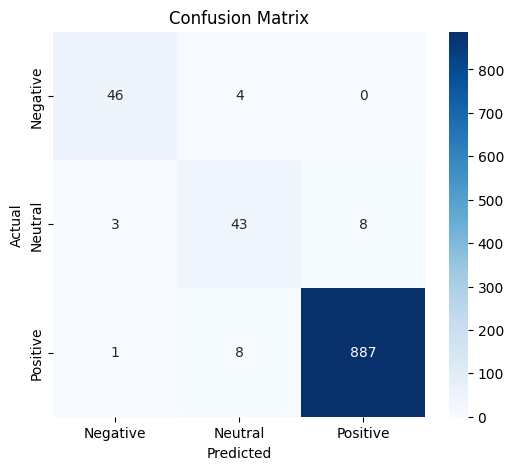

In [25]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define label names
labels = ['Negative', 'Neutral', 'Positive']

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
